## Data Preprocessing Lab: Time Series and Text (NLP)

This lab covers two core preprocessing workflows:

1. Time Series preprocessing (indexing, resampling, handling missing data)
2. Text preprocessing (cleaning, tokenization, vectorization)

## Part 1: Time Series Preprocessing

We will use a synthetic dataset simulating daily temperature readings over several months.

In [1]:
import pandas as pd
import numpy as np

# Generate synthetic time series data
np.random.seed(42)
date_rng = pd.date_range(start='2023-01-01', end='2023-04-30', freq='D')
temperature = np.random.normal(loc=15, scale=5, size=len(date_rng))
df_ts = pd.DataFrame({'Date': date_rng, 'Temperature': temperature})
df_ts.loc[np.random.choice(df_ts.index, 10), 'Temperature'] = np.nan  # add missing values
df_ts.set_index('Date', inplace=True)

df_ts.head()

,Temperature
Date,
2023-01-01,17.483571
2023-01-02,14.308678
2023-01-03,18.238443
2023-01-04,22.615149
2023-01-05,13.829233


### Plot the Time Series

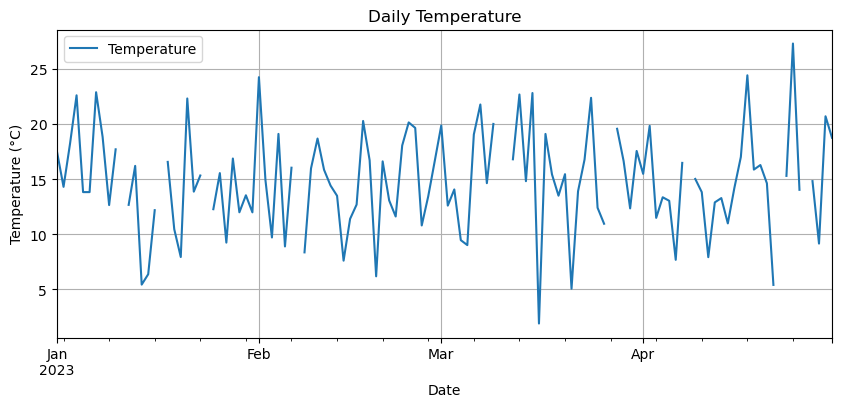

In [2]:
import matplotlib.pyplot as plt

df_ts.plot(figsize=(10, 4), title='Daily Temperature')
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()

### Fill Missing Values and Resample

In [3]:
# Interpolate missing values
df_filled = df_ts.interpolate()

# Resample to weekly average
df_weekly = df_filled.resample('W').mean()

df_weekly.head()

,Temperature
Date,
2023-01-01,17.483571
2023-01-08,17.793437
2023-01-15,12.321097
2023-01-22,13.962489
2023-01-29,13.585505


### Exercise 1: Time Series Handling


- Count the number of missing values in `df_ts`
- Fill missing values using forward fill instead of interpolation
- Plot both original and filled time series for comparison


In [10]:
#df_ts.count
print(df_ts.isnull().sum()) #Count the number of missing values
df_ffill = df_ts.fillna(method='ffill')

Temperature    10
dtype: int64


C:\Users\Gbemissola\AppData\Local\Temp\ipykernel_1752\824965446.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df_ts.fillna(method='ffill')


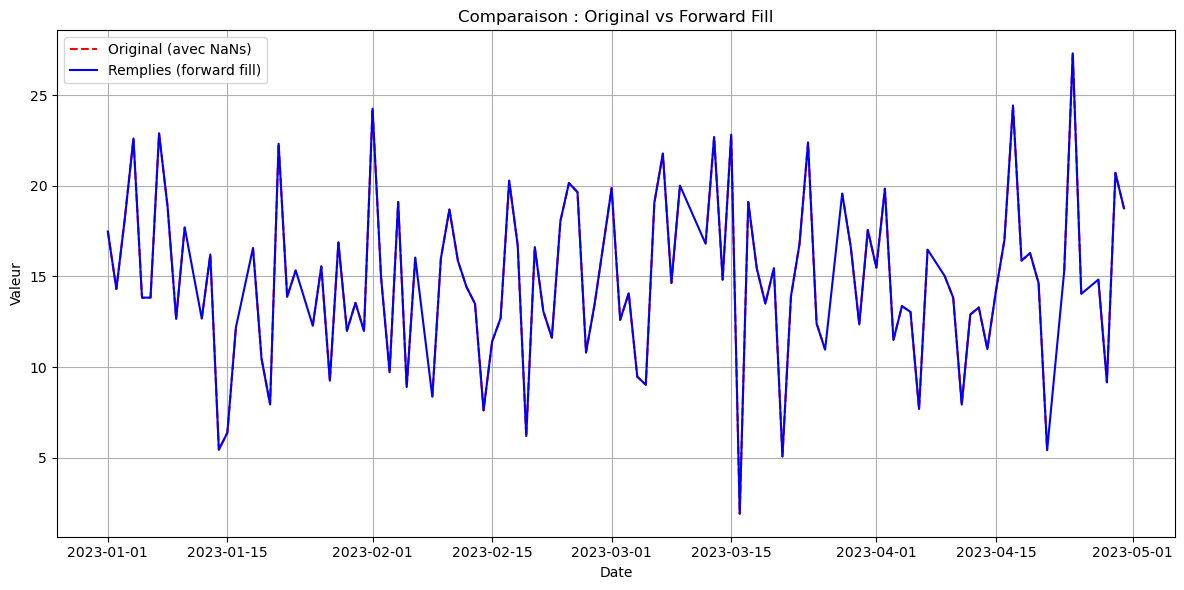

In [12]:

plt.figure(figsize=(12, 6))

# Tracer les données originales (avec NaNs)
plt.plot(df_ts, label='Original (avec NaNs)', linestyle='--', color='red')

# Tracer les données remplies
plt.plot(df_filled, label='Remplies (forward fill)', color='blue')

plt.title('Comparaison : Original vs Forward Fill')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Part 2: Text Preprocessing (NLP)

We will use a small corpus of text to explore common text preprocessing techniques.

In [14]:
documents = [
    "Natural Language Processing (NLP) is a subfield of AI.",
    "It focuses on understanding and generating human language.",
    "Text preprocessing is a crucial step in NLP pipelines.",
    "Common techniques include tokenization, stopword removal, and stemming."
]

### Basic Text Cleaning

In [15]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    return text

cleaned_docs = [clean_text(doc) for doc in documents]
cleaned_docs

['natural language processing nlp is a subfield of ai',
 'it focuses on understanding and generating human language',
 'text preprocessing is a crucial step in nlp pipelines',
 'common techniques include tokenization stopword removal and stemming']

### Tokenization and Stopword Removal

In [16]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def tokenize(text):
    return [word for word in text.split() if word not in ENGLISH_STOP_WORDS]

tokenized_docs = [tokenize(doc) for doc in cleaned_docs]
tokenized_docs

[['natural', 'language', 'processing', 'nlp', 'subfield', 'ai'],
 ['focuses', 'understanding', 'generating', 'human', 'language'],
 ['text', 'preprocessing', 'crucial', 'step', 'nlp', 'pipelines'],
 ['common',
  'techniques',
  'include',
  'tokenization',
  'stopword',
  'removal',
  'stemming']]

### Vectorization with CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(cleaned_docs)
pd.DataFrame(X_counts.toarray(), columns=vectorizer.get_feature_names_out())

### Exercise 2: Text Preprocessing


- Write a function to clean and tokenize a list of new documents
- Use `TfidfVectorizer` to vectorize them
- Print the TF-IDF matrix


In [21]:
new_docs = [
    "Summer is the warmest season of the year.",
    "People often go to the beach to relax and swim.",
    "Ice cream and cold drinks are popular in hot weather.",
    "Longer daylight hours make summer perfect for outdoor activities."
]

import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    return text

cleaned_docs = [clean_text(doc) for doc in new_docs]
cleaned_docs



['summer is the warmest season of the year',
 'people often go to the beach to relax and swim',
 'ice cream and cold drinks are popular in hot weather',
 'longer daylight hours make summer perfect for outdoor activities']

In [22]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def tokenize(text):
    return [word for word in text.split() if word not in ENGLISH_STOP_WORDS]

tokenized_docs = [tokenize(doc) for doc in cleaned_docs]
tokenized_docs

[['summer', 'warmest', 'season', 'year'],
 ['people', 'beach', 'relax', 'swim'],
 ['ice', 'cream', 'cold', 'drinks', 'popular', 'hot', 'weather'],
 ['longer',
  'daylight',
  'hours',
  'make',
  'summer',
  'perfect',
  'outdoor',
  'activities']]

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

#new_docs = ["Language models are powerful tools.", "Preprocessing affects model performance."]
tfidf = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf.fit_transform(new_docs)
pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

,activities,beach,cold,cream,daylight,drinks,hot,hours,ice,longer,...,people,perfect,popular,relax,season,summer,swim,warmest,weather,year
0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.525473,0.414289,0.0,0.525473,0.000000,0.525473
1,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.5,0.000000,0.000000,0.5,0.000000,0.000000,0.5,0.000000,0.000000,0.000000
2,0.000000,0.0,0.377964,0.377964,0.000000,0.377964,0.377964,0.000000,0.377964,0.000000,...,0.0,0.000000,0.377964,0.0,0.000000,0.000000,0.0,0.000000,0.377964,0.000000
3,0.362224,0.0,0.000000,0.000000,0.362224,0.000000,0.000000,0.362224,0.000000,0.362224,...,0.0,0.362224,0.000000,0.0,0.000000,0.285582,0.0,0.000000,0.000000,0.000000
